# Series de tiempo

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.__version__

'1.0.1'

In [5]:
df = pd.read_csv('../datasets/covid_19_data.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2902,2903,03/01/2020,NaN,Belgium,2020-03-01T12:43:02,2.0,0.0,1.0
35410,35411,06/05/2020,Atacama,Chile,2020-06-06 02:33:00,269.0,0.0,0.0
59786,59787,07/09/2020,NaN,Cabo Verde,2020-07-10 04:34:24,1552.0,18.0,730.0
24378,24379,05/13/2020,Maryland,US,2020-05-14 03:32:28,34812.0,1809.0,0.0
18693,18694,04/26/2020,NaN,Ecuador,2020-04-27 02:31:20,22719.0,576.0,1366.0
43422,43423,06/16/2020,Lombardia,Italy,2020-06-17 04:33:21,92060.0,16466.0,60361.0
3952,3953,03/07/2020,"Cobb County, GA",US,2020-03-07T16:53:03,1.0,0.0,0.0
12352,12353,04/06/2020,NaN,Mauritania,4/6/20 9:37,6.0,1.0,2.0
40420,40421,06/12/2020,Heilongjiang,Mainland China,2020-06-13 03:33:14,947.0,13.0,934.0
37892,37893,06/08/2020,Unknown,Spain,2020-06-09 03:33:03,0.0,0.0,0.0


In [6]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [8]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [10]:
df = df[['ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]
df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
68553,2020-07-20,Ukraine,678.0,20.0,551.0
68554,2020-07-20,Netherlands,791.0,69.0,0.0
68555,2020-07-20,Mainland China,1270.0,1.0,1267.0
68556,2020-07-20,Ukraine,1602.0,34.0,1251.0


In [12]:
df_group = df.groupby('ObservationDate')['Confirmed', 'Deaths', 'Recovered'].sum()
df_group.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [15]:
df1 = df_group['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [16]:
df2 = df_group['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [17]:
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [19]:
df_group

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0
...,...,...,...
2020-07-16,13805296.0,589911.0,7711525.0
2020-07-17,14055299.0,596518.0,7894890.0
2020-07-18,14292922.0,602144.0,8045827.0


In [24]:
df_diff = df_group.diff()
df_diff

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0
...,...,...,...
2020-07-16,250819.0,5787.0,152273.0
2020-07-17,250003.0,6607.0,183365.0
2020-07-18,237623.0,5626.0,150937.0


In [25]:
df_diff.mean()

Confirmed    81681.877778
Deaths        3388.166667
Recovered    46057.794444
dtype: float64

In [31]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,1041.111111,21.777778,21.555556
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,143629.733333,4640.600000,90398.100000
2020-07-31,211372.750000,4931.700000,146857.950000


In [32]:
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9,9,9
2020-02-29,29,29,29
2020-03-31,31,31,31
2020-04-30,30,30,30
2020-05-31,31,31,31
2020-06-30,30,30,30
2020-07-31,20,20,20


In [40]:
df_cum = df_group.resample('12h').sum(min_count=1)
df_cum.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0


In [42]:
df_cum.bfill().head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0


In [43]:
df_cum.ffill().head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0


In [47]:
df_cum.fillna(0).head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,0.0,0.0,0.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,0.0,0.0,0.0
2020-01-24 00:00:00,941.0,26.0,36.0


In [49]:
df_cum = df_cum.interpolate()
df_cum.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0


In [51]:
df_cum['rate'] = 1 - df_cum['Deaths'] / df_cum['Confirmed']
df_cum.head()

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370


In [53]:
df_cum = df_cum.reset_index()
df_cum.head()

,index,ObservationDate,Confirmed,Deaths,Recovered,rate
0,0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370


In [55]:
df_cum.groupby(pd.Grouper(key='ObservationDate', freq='M'))['rate'].mean()

ObservationDate
2020-01-31    0.974594
2020-02-29    0.973562
2020-03-31    0.960070
2020-04-30    0.936029
2020-05-31    0.933422
2020-06-30    0.945713
2020-07-31    0.955267
Freq: M, Name: rate, dtype: float64

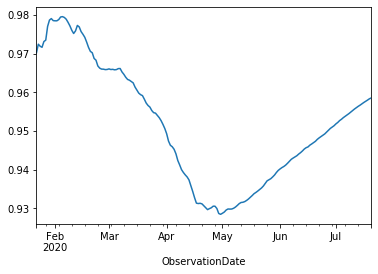

In [60]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq='1D'))['rate'].mean()
sr.plot()

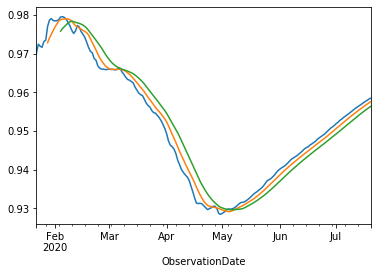

In [63]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=14).mean().plot()